In [44]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import PIL
from PIL import Image

## Quality Graphs 3/21

Steps: 

1. model trained. Take all testing images, run models around 20 epochs (10 different models) through them and store neatly in folders (idk what'll happen with different epochs, try it out), only black (around 86 black) and place into folder (results folder in pix2pix section, folder with name of model test). Take the fake_fundus names, dataset will be aligned.
--- name them like such: id + _ + epoch + epoch_number, if not already named like this

2. run images from this folder through quality control model and place in quality run dataset folder (will probably appear in quality run command - figure out how to run through docker - write docker command similar to deeprop command one)

3. quality control model outputs csv with quality rating between 0 and 1 for all the images. Read csv into dataframes depending on epoch and just get a bunch of average values (can write function for this)

4. Graph average values vs. epochs up to 200 epochs


**Issues with bad images... I'll run this right now just so I know the process. And also share my thoughts and perspectives in a meeting with them on Tuesday. -- loss curves bad -- Ask if useful just to sit in on the 12 - 2 meeting?**

### Testing Model and Getting Test Images

In [9]:
os.getcwd()

'/users/riya/race/gancode'

In [10]:
os.chdir('/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix/')
os.getcwd()

'/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix'

In [32]:
!python test.py --dataroot /users/riya/race/gandataset --epoch 150 --name raceGAN_final3 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 125 --name raceGAN_final3 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 100 --name raceGAN_final3 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 75 --name raceGAN_final3 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 50 --name raceGAN_final3 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 25 --name raceGAN_final3 --model pix2pix --num_test 86

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

processing (0085)-th image... ['/users/riya/race/gandataset/test/98322.bmp']
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 100                           	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False   

processing (0080)-th image... ['/users/riya/race/gandataset/test/96857.bmp']
processing (0085)-th image... ['/users/riya/race/gandataset/test/98322.bmp']
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 50                            	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                

processing (0075)-th image... ['/users/riya/race/gandataset/test/9477.bmp']
processing (0080)-th image... ['/users/riya/race/gandataset/test/96857.bmp']
processing (0085)-th image... ['/users/riya/race/gandataset/test/98322.bmp']


### Copy images from GAN results into quality DeepROP dataset folder

In [38]:
results_path = "/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix/results/"
quality_path = "/users/riya/race/segmentation_run/DeepROP/quality_dataset/"

In [39]:
test_ids = [37047 ,18789 ,30051 ,33961 ,96646 ,92768 ,96994 ,91954 ,93148 ,98264 ,25832 ,47250 ,39567,
            40804 ,93149 ,98322 ,33981 ,30031 ,39561 ,39206 ,9477 ,39578 ,101696 ,101740 ,45347 ,37988,
            31328 ,101734 ,49226 ,17400 ,62416 ,96989 ,92747 ,54055 ,80935 ,75671 ,74717 ,91920 ,34742 ,
            96245 ,26900 ,105657 ,45035 ,96857 ,31331 ,34454 ,31003 ,101729 ,30029 ,87363 ,105655 ,75661 ,
            33987 ,88758 ,91947 ,96998 ,89094 ,79675 ,105679 ,89116 ,96852 ,91956 ,101916 ,31333 ,50963 ,
            74909 ,55217 ,96154 ,75676 ,101732 ,77119 ,74722 ,91924 ,76794 ,17362 ,92760 ,77101 ,49227 ,
            50974 ,45343 ,103117 ,45055 ,101921 ,49217 ,91936 ,105673]

In [40]:
len(test_ids) # yay!

86

In [49]:
def move_DeepROP(path_input, name, path_copy, ids, epochs): # ids & epochs ints (except for latest), convert to string 
    for i in epochs:
        for j in ids:
            full_path = path_input + name + "/test_" + str(i) +  "/images/"
            fund_fake_image = Image.open(full_path + str(j) + "_fake_B" + ".png")
            fund_fake_image.save(path_copy + str(j) + "_epoch" + str(i) + ".png")

In [50]:
move_DeepROP(results_path,"raceGAN_final3", quality_path, test_ids, [25,50,75,100,125,150])

### Running Quality Control Model

Happened neatly! Also ran optic disk segmenter model - interesting how that worked with different epochs.

### Generating Graphic

In [70]:
quality_csv_path = "/users/riya/race/segmentation_run/DeepROP/quality_assurance/QA.csv"

In [71]:
quality_csv = pd.read_csv(quality_csv_path, usecols=[0,1,2])

In [80]:
quality_csv.rename(columns={quality_csv.columns[0]:"img_name","Full path":"path","Quality":"quality"}, inplace=True)

In [81]:
quality_csv.head()

,img_name,path,quality
0,101696_epoch100,/data/quality_dataset/101696_epoch100.png,3.251219e-06
1,101696_epoch125,/data/quality_dataset/101696_epoch125.png,4.248583e-07
2,101696_epoch150,/data/quality_dataset/101696_epoch150.png,1.967786e-06
3,101696_epoch25,/data/quality_dataset/101696_epoch25.png,1.310255e-04
4,101696_epoch50,/data/quality_dataset/101696_epoch50.png,6.718443e-04


In [92]:
len(quality_csv) # yay!!

516

In [120]:
quality_csv.loc[(quality_csv['quality']> 0.75) & (quality_csv['epoch'] == '75')] ## highest quality in epoch 25!!

# is lower quality better?

,img_name,path,quality,epoch
119,30051_epoch75,/data/quality_dataset/30051_epoch75.png,0.807507,75
167,34454_epoch75,/data/quality_dataset/34454_epoch75.png,0.862756,75
173,34742_epoch75,/data/quality_dataset/34742_epoch75.png,0.848572,75
335,76794_epoch75,/data/quality_dataset/76794_epoch75.png,0.789328,75
443,93148_epoch75,/data/quality_dataset/93148_epoch75.png,0.757367,75
467,96245_epoch75,/data/quality_dataset/96245_epoch75.png,0.997112,75


I want to make a plot of average quality on epoch vs. epochs. First, I should create an epoch column :)

In [121]:
# creating epoch column 

epoch = [0]*516

for i in range(len(quality_csv)):
    img_str = quality_csv['img_name'][i]
    epoch_val = img_str.split("epoch",1)[1] # split before and after and only get after split
    epoch[i] = int(epoch_val)
    
quality_csv['epoch'] = epoch

In [122]:
quality_csv.head()

,img_name,path,quality,epoch
0,101696_epoch100,/data/quality_dataset/101696_epoch100.png,3.251219e-06,100
1,101696_epoch125,/data/quality_dataset/101696_epoch125.png,4.248583e-07,125
2,101696_epoch150,/data/quality_dataset/101696_epoch150.png,1.967786e-06,150
3,101696_epoch25,/data/quality_dataset/101696_epoch25.png,1.310255e-04,25
4,101696_epoch50,/data/quality_dataset/101696_epoch50.png,6.718443e-04,50


In [123]:
average_quality = quality_csv.groupby('epoch', as_index=False)[['quality']].mean()

In [124]:
average_quality

,epoch,quality
0,25,0.231292
1,50,0.164664
2,75,0.096870
3,100,0.090089
4,125,0.105532
5,150,0.054873


<AxesSubplot:title={'center':'Quality vs. Epochs'}, xlabel='epoch', ylabel='quality'>

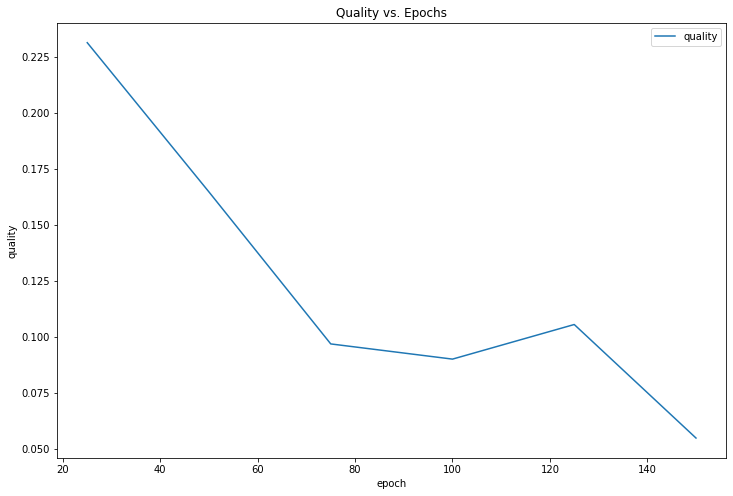

In [125]:
average_quality.plot(x ='epoch', y=['quality'], figsize = (12,8), title = 'Quality vs. Epochs', ylabel = 'quality', xlabel = 'epoch')


### A Bit OLD

In [11]:
# gets saved in results/raceGAN_final1

!python test.py --dataroot /users/riya/race/gandataset --epoch latest --name raceGAN_final1 --model pix2pix --num_test 86

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [12]:
!python test.py --dataroot /users/riya/race/gandataset --epoch 180 --name raceGAN_final1 --model pix2pix --num_test 86

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 180                           	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0          

In [13]:
!python test.py --dataroot /users/riya/race/gandataset --epoch 160 --name raceGAN_final1 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 140 --name raceGAN_final1 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 120 --name raceGAN_final1 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 100 --name raceGAN_final1 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 80 --name raceGAN_final1 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 60 --name raceGAN_final1 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 40 --name raceGAN_final1 --model pix2pix --num_test 86
!python test.py --dataroot /users/riya/race/gandataset --epoch 20 --name raceGAN_final1 --model pix2pix --num_test 86

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 160                           	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0          

processing (0085)-th image... ['/users/riya/race/gandataset/test/98322.bmp']
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 120                           	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False   

processing (0080)-th image... ['/users/riya/race/gandataset/test/96857.bmp']
processing (0085)-th image... ['/users/riya/race/gandataset/test/98322.bmp']
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 80                            	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                

processing (0075)-th image... ['/users/riya/race/gandataset/test/9477.bmp']
processing (0080)-th image... ['/users/riya/race/gandataset/test/96857.bmp']
processing (0085)-th image... ['/users/riya/race/gandataset/test/98322.bmp']
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/race/gandataset   	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 40                            	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                         

processing (0070)-th image... ['/users/riya/race/gandataset/test/92747.bmp']
processing (0075)-th image... ['/users/riya/race/gandataset/test/9477.bmp']
processing (0080)-th image... ['/users/riya/race/gandataset/test/96857.bmp']
processing (0085)-th image... ['/users/riya/race/gandataset/test/98322.bmp']


## Loss Graphs 3/17

#### Very useful to mark succesful training

https://machinelearningmastery.com/practical-guide-to-gan-failure-modes/

In [5]:
header_list = ['epoch', 'G_GAN', 'G_L1', 'D_real', 'D_fake']
loss_path = "/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix/checkpoints/"

def plot_results(name, skip):
    
    df = pd.read_csv(loss_path + name + '/loss_clean.csv', skiprows = skip, names = header_list)   
    df.reset_index(inplace = True)
    
    scale = df['epoch'].max()/len(df) # small inaccuracy, because epoch max is not epoch always at (decimal epochs), but that should be fine
    df['x-val'] = df['index'] * scale
    
    # average_results = df.groupby('epoch', as_index=False)[['G_GAN','G_L1','D_real','D_fake']].mean()
    df.plot(x ='x-val', y=['G_GAN','D_real','D_fake'], figsize = (12,8), title = 'Loss vs. Epochs', ylabel = 'loss', xlabel = 'epoch')
    df.plot(x='x-val', y=['G_L1'], figsize = (12,8), title = 'Loss vs. Epochs', ylabel = 'loss', color ='red', xlabel = 'epoch')

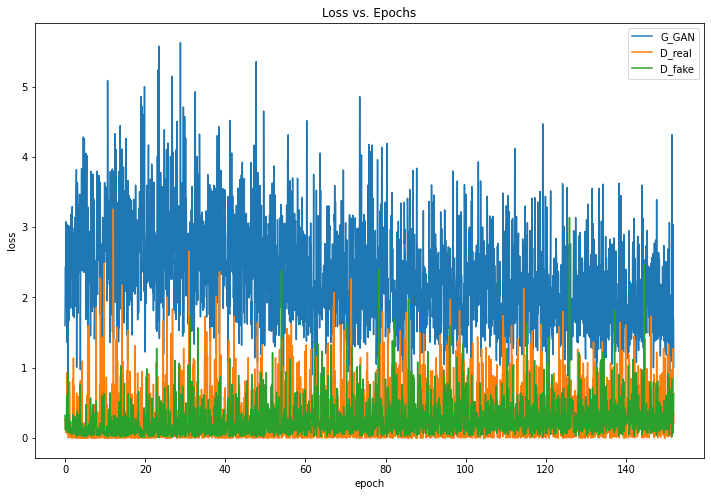

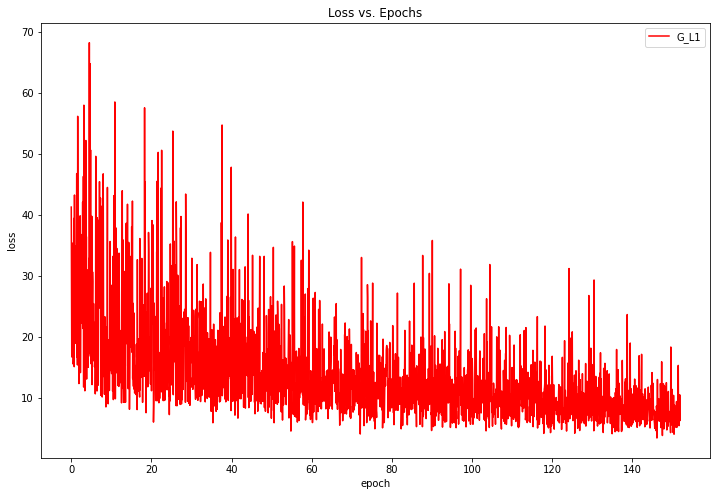

In [128]:
plot_results('raceGAN_final4', 0)

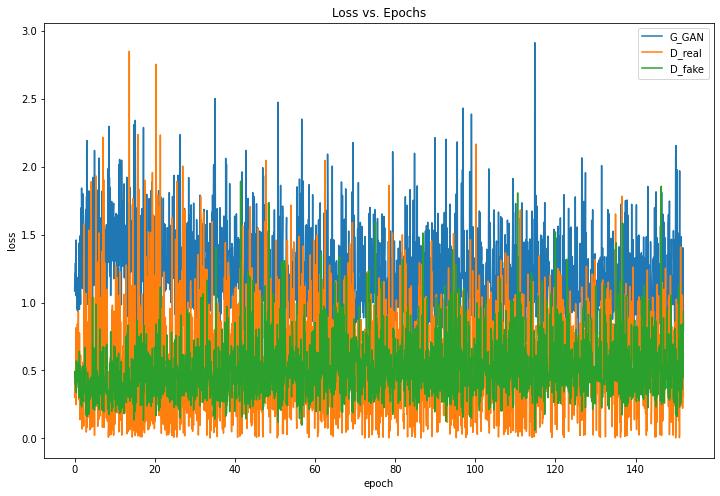

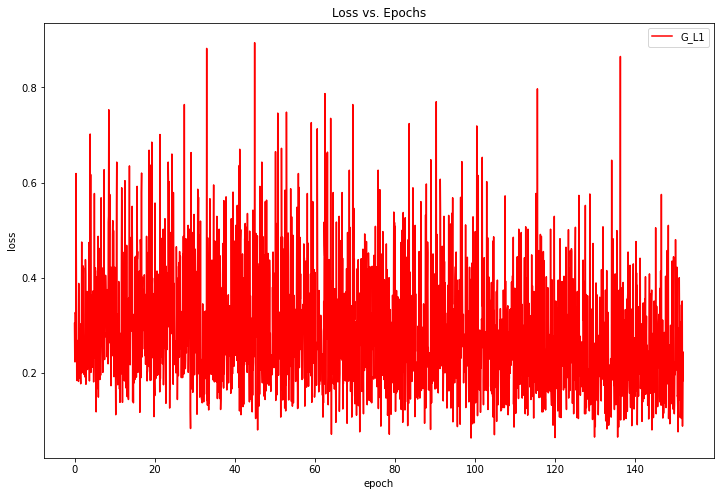

In [127]:
plot_results('raceGAN_final5', 0)

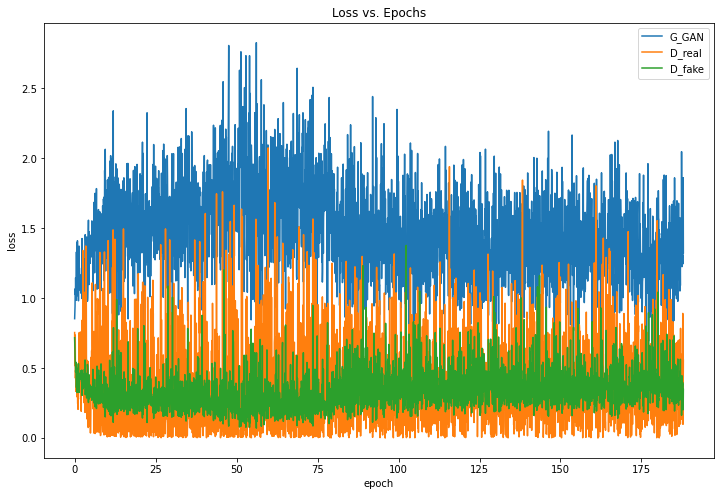

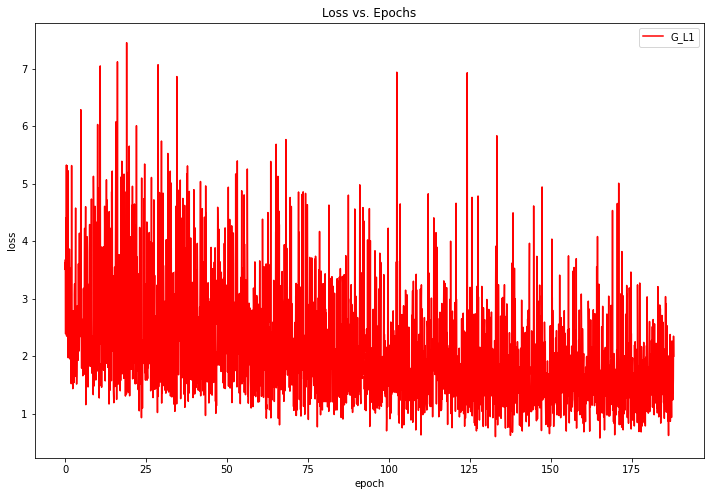

In [126]:
plot_results('raceGAN_final2', 0)

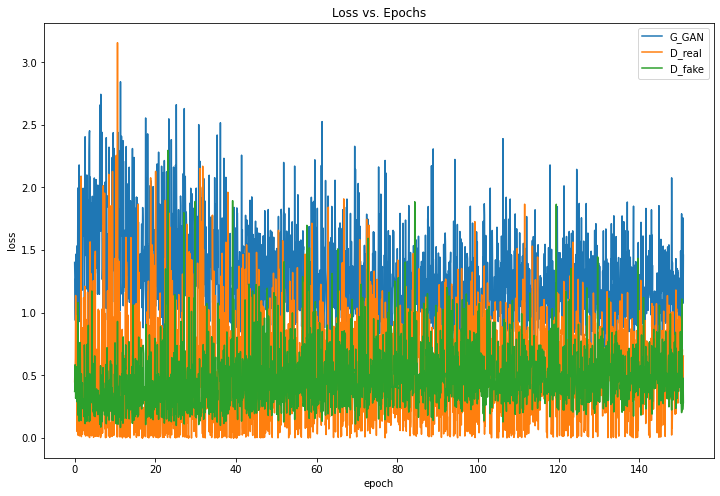

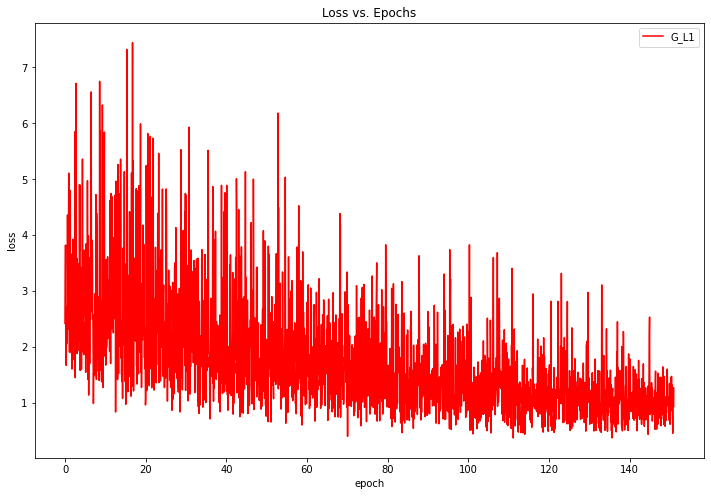

In [31]:
plot_results('raceGAN_final3',0)

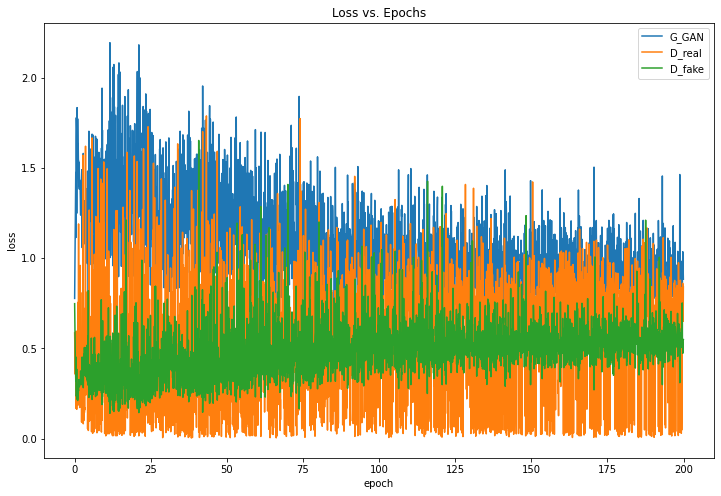

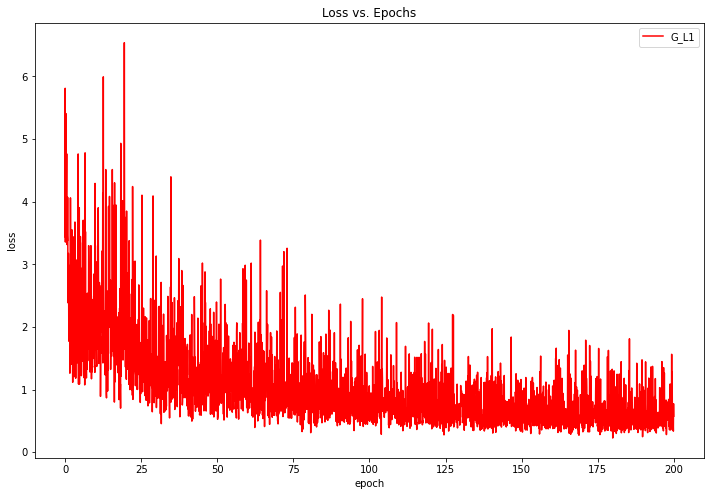

In [14]:
plot_results('raceGAN_final1',0)

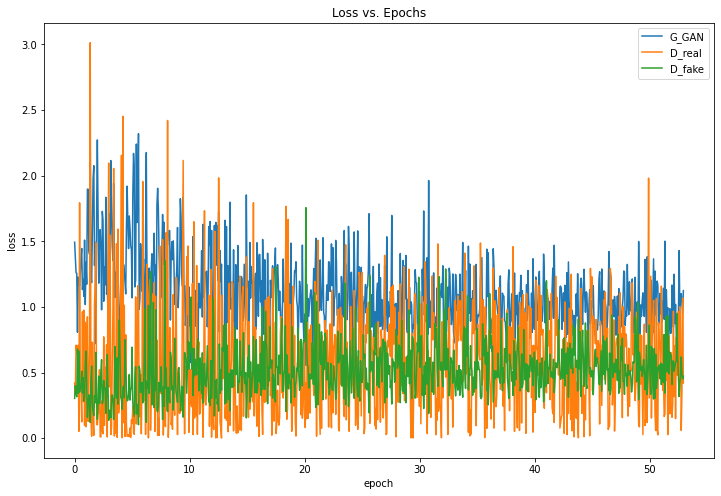

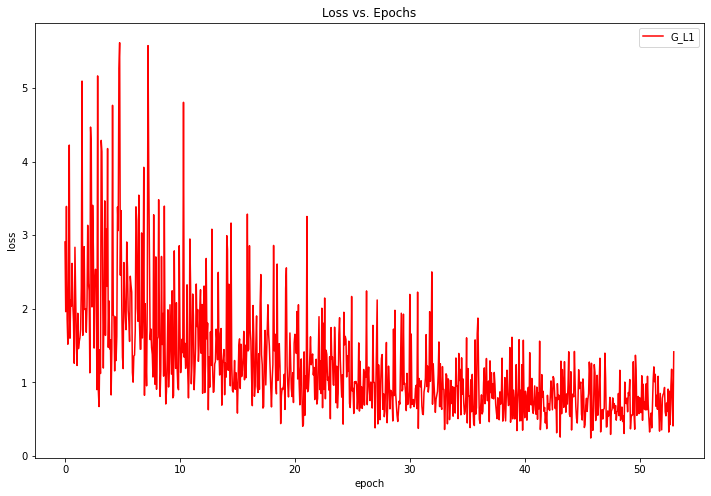

In [206]:
plot_results('raceGAN_l1_test1', 0)

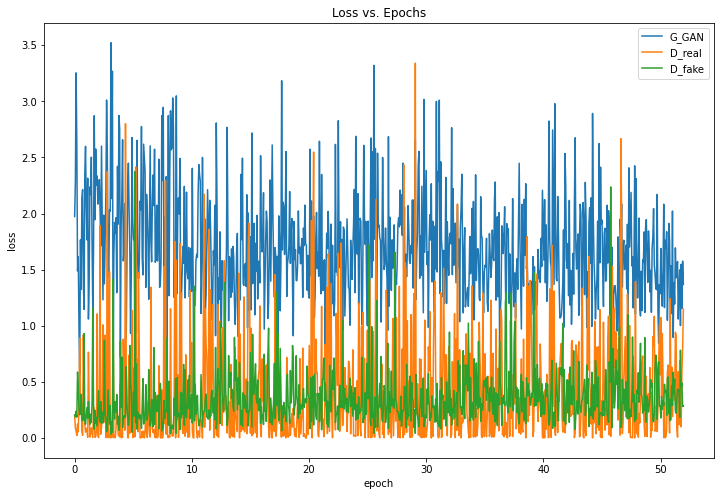

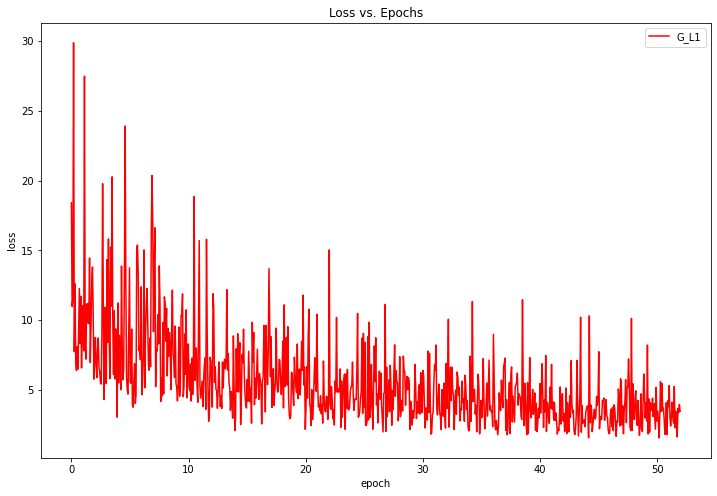

In [207]:
plot_results('raceGAN_l1_test2', 0)

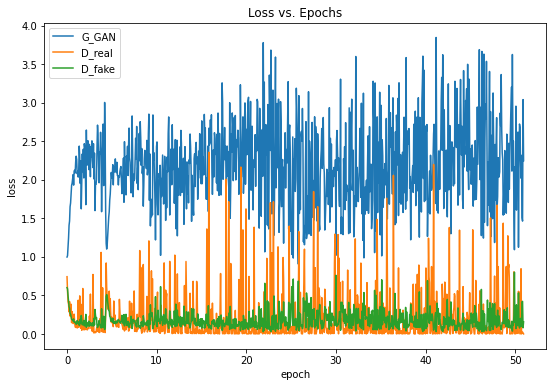

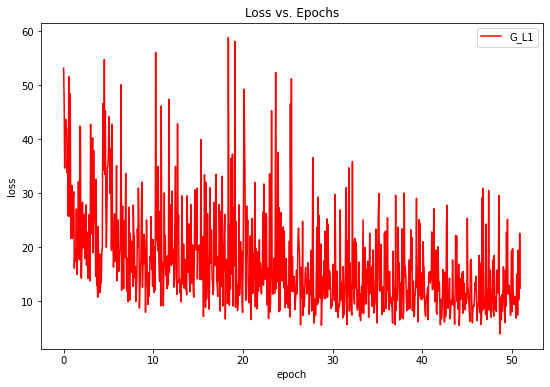

In [198]:
plot_results('raceGAN_test2', 0)

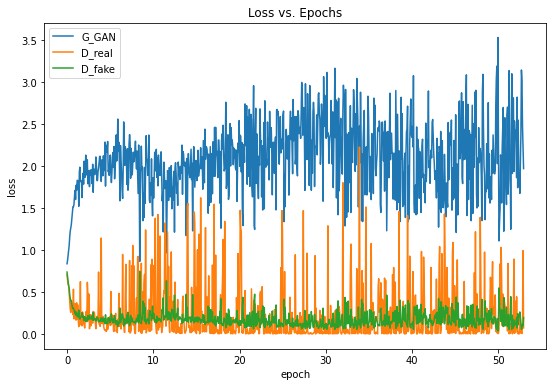

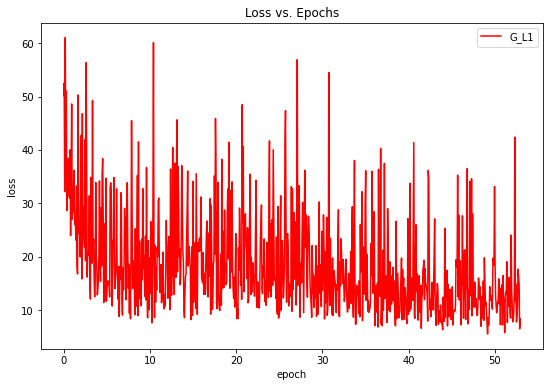

In [199]:
plot_results('raceGAN_test4', 0)

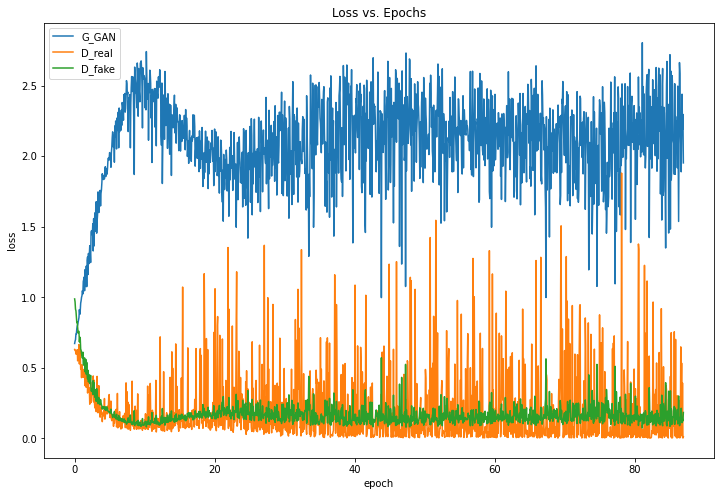

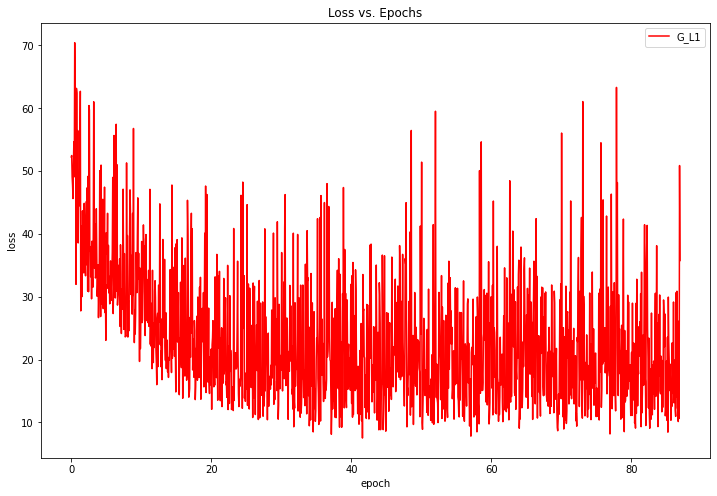

In [208]:
plot_results('raceGAN_test5', 1)

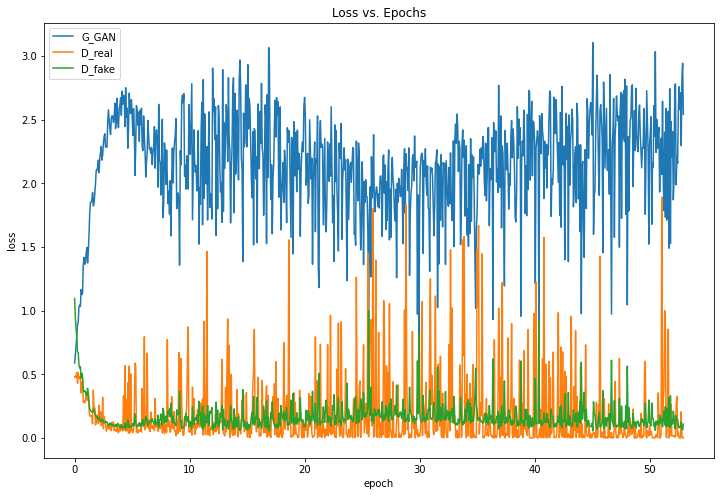

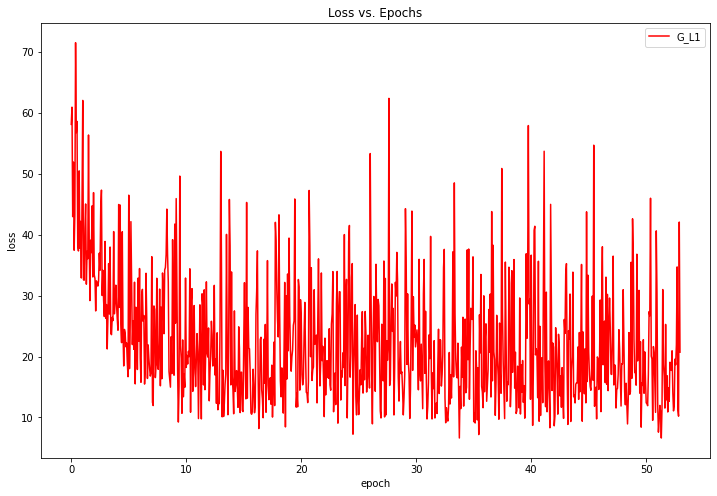

In [209]:
plot_results('raceGAN_test6', 0)